In [1]:
%matplotlib inline
%load_ext autoreload
%config InlineBackend.figure_format = 'retina' # high res plotting
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import sys

In [2]:
# Import Seaborn

import seaborn as sns
# sns.set_style('whitegrid')
sns.set_context("paper")

In [3]:
import matplotlib
# plot settings
# font = {'family' : 'Bitstream Vera Sans',
#         'weight' : 'regular',
#         'size'   : 13}
font = {'weight' : 'regular',
        'size'   : 20}
figure = {'figsize' : (20,8)}

matplotlib.rc('font', **font)
matplotlib.rc('figure', **figure)

In [4]:
%autoreload 2
# import BirdSongToolbox.GetBirdData as gbd
# import BirdSongToolbox.file_utility_functions as fuf
# import BirdSongToolbox.Epoch_Analysis_Tools as bep
# import BirdSongToolbox as tb
# from BirdSongToolbox.file_utility_functions import _load_pckl_data #, _load_numpy_data, _load_json_data
import BirdSongToolbox.free_epoch_tools as fet
import BirdSongToolbox.preprocess as pp

from BirdSongToolbox.import_data import ImportData
from BirdSongToolbox.context_hand_labeling import ContextLabels
from BirdSongToolbox.context_hand_labeling import label_focus_context, first_context_func, last_context_func, mid_context_func
from BirdSongToolbox.behave.behave_utils import event_array_maker_chunk, get_events_rasters, repeat_events

In [5]:
#file structure for /src
package_folder = '/home/debrown/Songbird-LFP-Paper/'
sys.path.append(package_folder)

In [6]:
%autoreload 2
import src.analysis.hilbert_based_pipeline as hbp
from src.analysis.context_utility import birds_context_obj
from src.utils.paths import FIGURES_DIR

# Get the Data

In [85]:
# Select bird_id and session
bird_id = 'z007'
session =  'day-2016-09-11'
# 'day-2016-09-11'

In [8]:

def get_spectral_data(bird_id, session, fc_lo, fc_hi):
    zdata = ImportData(bird_id=bird_id, session=session)
    
    # Reshape Handlabels into Useful Format
    chunk_labels_list, chunk_onsets_list = fet.get_chunk_handlabels(handlabels_list=zdata.song_handlabels)
    
    proc_data = hbp.spectral_perturbation_chunk(neural_chunks=zdata.song_neural, 
                                        fs=1000, 
                                        l_freqs=fc_lo, 
                                        h_freqs=fc_hi, 
                                        verbose=True)
    
    # Create instance of the Context Labels Class
    testclass = birds_context_obj(bird_id=bird_id)
    
    # Get the Context Array for the Day's Data
    test_context = testclass.get_all_context_index_arrays(chunk_labels_list)
    
    # Select Labels Using Flexible Context Selection
    first_syll = label_focus_context(focus=1, 
                                     labels=chunk_labels_list, 
                                     starts= chunk_onsets_list[0], 
                                     contexts= test_context, 
                                     context_func=first_context_func)

    last_syll = label_focus_context(focus=5, 
                                    labels=chunk_labels_list, 
                                    starts= chunk_onsets_list[1], 
                                    contexts= test_context, 
                                    context_func=last_context_func)
    
    # Set the Context Windows
    first_window = (-500, 800)
    last_window = (-800, 300)
    
    # Clip around Events of Interest
    all_firsts = fet.get_event_related_nd_chunk(chunk_data=proc_data, chunk_indices=first_syll, 
                                            fs=1000, window=first_window )
    all_lasts = fet.get_event_related_nd_chunk(chunk_data=proc_data, chunk_indices=last_syll, 
                                        fs=1000, window=last_window )
    
    all_firsts = fet.event_shape_correction(all_firsts, original_dim=3)
    all_lasts = fet.event_shape_correction(all_lasts, original_dim=3)
    
    # Take Mean Across the Instances (Examplars)
    mean_first = np.mean(all_firsts, axis = 0)
    mean_last = np.mean(all_lasts, axis = 0)
    
    # Create timeseries representing the labeled Events For all Chunks
    event_array_test2 = event_array_maker_chunk(labels_list=chunk_labels_list, 
                                            onsets_list=chunk_onsets_list)
    
    # Make Behavior Raster for First 
    first_events = get_events_rasters(data= event_array_test2, indices= first_syll, fs=1000, window=first_window)
#     first_events = np.delete(first_events2, first_rm, axis = 0)
    fill_events_first = repeat_events(first_events)

    # Make Behavior Raster for Last 
    last_events = get_events_rasters(data= event_array_test2, indices= last_syll, fs=1000, window=last_window)
#     last_events = np.delete(last_events2, last_rm, axis = 0)

    fill_events_last = repeat_events(last_events)
    
    
    return mean_first, mean_last, fill_events_first, fill_events_last


In [8]:
mean_first_1, mean_last_1, fill_events_first_1, fill_events_last_1 = get_spectral_data(bird_id= 'z007', 
                                                                                       session= 'day-2016-09-11', 
                                                                                       fc_lo=fc_lo,
                                                                                       fc_hi=fc_hi)



NameError: name 'get_spectral_data' is not defined

In [9]:
zdata = ImportData(bird_id=bird_id, session=session)

In [10]:
# Reshape Handlabels into Useful Format
chunk_labels_list, chunk_onsets_list = fet.get_chunk_handlabels(handlabels_list=zdata.song_handlabels)


# Pre-Process The Data to get the Normalized Power Values

In [12]:
# fc_lo = np.arange(3, 249, 2)
# fc_hi = np.arange(5, 251, 2)

In [11]:
freq_bins = 100
fc_lo = np.logspace(np.log10(2), np.log10(220), freq_bins)
fc_hi = np.logspace(np.log10(3), np.log10(250), freq_bins)

In [12]:
len(fc_lo)

100

In [13]:
(fc_hi-fc_lo)

array([ 1.        ,  1.039815  ,  1.08116349,  1.12410165,  1.16868755,
        1.21498119,  1.2630446 ,  1.31294183,  1.36473906,  1.41850465,
        1.47430915,  1.53222541,  1.59232864,  1.65469643,  1.71940882,
        1.78654839,  1.85620029,  1.92845232,  2.00339495,  2.08112143,
        2.16172783,  2.24531309,  2.33197907,  2.42183064,  2.5149757 ,
        2.61152526,  2.71159348,  2.81529773,  2.92275861,  3.03410004,
        3.14944928,  3.26893695,  3.39269711,  3.52086726,  3.65358837,
        3.79100492,  3.9332649 ,  4.08051983,  4.23292475,  4.39063823,
        4.55382237,  4.72264273,  4.89726838,  5.07787176,  5.26462873,
        5.4577184 ,  5.65732314,  5.86362846,  6.07682285,  6.29709772,
        6.52464724,  6.75966812,  7.00235951,  7.2529227 ,  7.51156097,
        7.77847924,  8.05388384,  8.33798216,  8.6309823 ,  8.93309267,
        9.24452156,  9.56547666,  9.89616457, 10.23679017, 10.58755607,
       10.94866192, 11.32030363, 11.70267267, 12.09595512, 12.50

In [14]:
((fc_hi-fc_lo)/2) + fc_lo

array([  2.5       ,   2.61715712,   2.73980972,   2.86821584,
         3.00264563,   3.14338191,   3.29072084,   3.44497248,
         3.60646145,   3.77552765,   3.95252695,   4.13783195,
         4.33183277,   4.53493787,   4.7475749 ,   4.97019164,
         5.20325693,   5.44726162,   5.70271967,   5.97016922,
         6.25017369,   6.54332302,   6.85023488,   7.171556  ,
         7.50796355,   7.86016651,   8.22890726,   8.61496306,
         9.01914778,   9.44231354,   9.88535258,  10.34919911,
        10.83483129,  11.34327334,  11.87559765,  12.43292707,
        13.01643731,  13.62735942,  14.26698238,  14.93665583,
        15.63779295,  16.37187346,  17.14044669,  17.94513496,
        18.78763692,  19.66973122,  20.59328025,  21.56023409,
        22.57263464,  23.63261994,  24.74242873,  25.90440518,
        27.12100383,  28.39479485,  29.72846946,  31.12484562,
        32.58687405,  34.11764445,  35.72039205,  37.39850453,
        39.15552914,  40.99518026,  42.92134727,  44.93

In [15]:
proc_data = hbp.spectral_perturbation_chunk(neural_chunks=zdata.song_neural, 
                                        fs=1000, 
                                        l_freqs=fc_lo, 
                                        h_freqs=fc_hi, 
                                        verbose=True)

On Chunk # 0
CAR Done
Filters Done
Hilbert Done
Normalize Done
On Chunk # 1
CAR Done
Filters Done
Hilbert Done
Normalize Done
On Chunk # 2
CAR Done
Filters Done
Hilbert Done
Normalize Done
On Chunk # 3
CAR Done
Filters Done
Hilbert Done
Normalize Done
On Chunk # 4
CAR Done
Filters Done
Hilbert Done
Normalize Done
On Chunk # 5
CAR Done
Filters Done
Hilbert Done
Normalize Done
On Chunk # 6
CAR Done
Filters Done
Hilbert Done
Normalize Done
On Chunk # 7
CAR Done
Filters Done
Hilbert Done
Normalize Done
On Chunk # 8
CAR Done
Filters Done
Hilbert Done
Normalize Done
On Chunk # 9
CAR Done
Filters Done
Hilbert Done
Normalize Done
On Chunk # 10
CAR Done
Filters Done
Hilbert Done
Normalize Done
On Chunk # 11
CAR Done
Filters Done
Hilbert Done
Normalize Done
On Chunk # 12
CAR Done
Filters Done
Hilbert Done
Normalize Done
On Chunk # 13
CAR Done
Filters Done
Hilbert Done
Normalize Done
On Chunk # 14
CAR Done
Filters Done
Hilbert Done
Normalize Done
On Chunk # 15
CAR Done
Filters Done
Hilbert Done
N

# Get the Start Times of the Events of Interest

In [21]:
# Create instance of the Context Labels Class
testclass = birds_context_obj(bird_id=bird_id)

In [22]:
# Get the Context Array for the Day's Data

test_context = testclass.get_all_context_index_arrays(chunk_labels_list)

In [23]:
test_context

[array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [1., 1., 0., 0.],
        [1., 1., 0., 0.],
        [1., 1., 0., 0.],
        [1., 1., 0., 0.],
        [1., 1., 0., 0.],
        [1., 1., 0., 0.],
        [1., 1., 0., 0.],
        [1., 1., 0., 0.],
        [1., 1., 0., 0.],
        [0., 0., 0., 0.],
        [2., 0., 0., 0.],
        [2., 0., 0., 0.],
        [2., 0., 0., 0.],
        [2., 0., 0., 0.],
        [2., 0., 0., 0.],
        [2., 0., 0., 0.],
        [2., 0., 0., 0.],
        [2., 0., 0., 0.],
        [2.,

In [86]:
# Select Labels Using Flexible Context Selection
first_syll = label_focus_context(focus=1, 
                                 labels=chunk_labels_list, 
                                 starts= chunk_onsets_list[0], 
                                 contexts= test_context, 
                                 context_func=first_context_func)

last_syll = label_focus_context(focus=5, 
                                labels=chunk_labels_list, 
                                starts= chunk_onsets_list[1], 
                                contexts= test_context, 
                                context_func=last_context_func)

# mid_syll = label_focus_context(focus=1, 
#                                       labels=chunk_labels_list, 
#                                       starts= chunk_onsets_list[0], 
#                                       contexts= test_context, 
#                                       context_func=mid_context_func)

# Get the Event alligned Values of Interest Using


In [87]:
# Set the Context Windows

first_window = (-500, 800)
last_window = (-800, 300)
# mid_window = (-2000, 2000)

In [107]:
# Remove Outlier Motifs for the Visualization:

first_rm = [6, 13, 14, 15, 16, 20, 31, 7, 8, 36] # Last 3 are from code glitch
last_rm = [6, 11, 13, 17, 19, 20, 21, 33]


In [89]:
# Clip around Events of Interest
all_firsts = fet.get_event_related_nd_chunk(chunk_data=proc_data, chunk_indices=first_syll, 
                                        fs=1000, window=first_window )

all_lasts = fet.get_event_related_nd_chunk(chunk_data=proc_data, chunk_indices=last_syll, 
                                        fs=1000, window=last_window )

# all_mids = fet.get_event_related_nd_chunk(chunk_data=proc_data, chunk_indices=mid_syll, 
#                                         fs=1000, window=mid_window )

In [90]:
# Correct The Shape of the Data
print(np.shape(all_firsts[4]))





all_firsts = fet.event_shape_correction(all_firsts, original_dim=3)

all_lasts = fet.event_shape_correction(all_lasts, original_dim=3)

# all_mids =  fet.event_shape_correction(all_mids)

(2, 100, 32, 1300)


In [108]:
print(np.shape(all_firsts))

all_firsts = np.delete(all_firsts, first_rm, axis = 0)
all_lasts = np.delete(all_lasts, last_rm, axis = 0)

(37, 100, 32, 1300)


In [91]:
print(np.shape(all_firsts))
print(np.shape(all_lasts))


(37, 100, 32, 1300)
(35, 100, 32, 1100)


In [109]:
# Take Mean Across the Instances (Examplars)

mean_first = np.mean(all_firsts, axis = 0)

mean_last = np.mean(all_lasts, axis = 0)

# mean_mid = np.mean(all_mids, axis = 0)

In [68]:
# mid_event_times = fet.make_event_times_axis(mid_window, fs=1000)

# Make the Event Raster Plot (To Show Behavior Above Activity)

In [110]:
# Create timeseries representing the labeled Events For all Chunks



event_array_test2 = event_array_maker_chunk(labels_list=chunk_labels_list, 
                                        onsets_list=chunk_onsets_list)


In [94]:
# event_array_maker_chunk??

In [71]:

# np.shape(event_array_test2[0])

In [111]:
# Make Behavior Raster for First 
first_events2 = get_events_rasters(data= event_array_test2, indices= first_syll, fs=1000, window=first_window)
first_events = np.delete(first_events2, first_rm, axis = 0)
fill_events_first = repeat_events(first_events)

# Make Behavior Raster for Last 
last_events2 = get_events_rasters(data= event_array_test2, indices= last_syll, fs=1000, window=last_window)
last_events = np.delete(last_events2, last_rm, axis = 0)

fill_events_last = repeat_events(last_events)

# # Make Behavior Raster formid 
# mid_events = get_events_rasters(data= event_array_test2, indices= mid_syll, fs=1000, window=mid_window)
# fill_events_mid = repeat_events(mid_events)

In [95]:
## First Run to find regions to remove

# Make Behavior Raster for First 
first_events = get_events_rasters(data= event_array_test2, indices= first_syll, fs=1000, window=first_window)
# first_events = np.delete(first_events2, first_rm, axis = 0)
fill_events_first = repeat_events(first_events)

# Make Behavior Raster for Last 
last_events = get_events_rasters(data= event_array_test2, indices= last_syll, fs=1000, window=last_window)
# last_events = np.delete(last_events2, last_rm, axis = 0)

fill_events_last = repeat_events(last_events)

# # Make Behavior Raster formid 
# mid_events = get_events_rasters(data= event_array_test2, indices= mid_syll, fs=1000, window=mid_window)
# fill_events_mid = repeat_events(mid_events)

In [112]:
# Create the Event Times 

first_event_times = fet.make_event_times_axis(first_window, fs=1000)
last_event_times = fet.make_event_times_axis(last_window, fs=1000)
# mid_event_times = fet.make_event_times_axis(mid_window, fs=1000)


In [113]:
np.shape(first_event_times)

(1300,)

In [114]:
np.shape(last_event_times)

(1100,)

In [115]:
def plot_pretty_ersp(ersp, event_times, fc_lo, fc_hi, cmap=None, **kwargs):
    """

    :param cmap:
    :param ersp:
    :param event_times:
    :param kwargs: Check the Seaborn Options (Lots of control here)
    :return:
    """

    # TODO: Make it such that you can control the filters if you want to
#     fc_lo = np.arange(3, 249, 2)
#     fc_hi = np.arange(5, 251, 2)

    if cmap is None:
        cmap = 'RdBu_r'

    ax = sns.heatmap(ersp, xticklabels=event_times, yticklabels= np.round((fc_lo + fc_hi) / 2), cmap=cmap, **kwargs)

    ax.invert_yaxis()
    
    visible_xticks = []
    visible_xtickslabels = []
    for ind, label in enumerate(ax.get_xticklabels()):
        if ind % 100 == 0:
#             label.set_visible(True)
            visible_xticks.append(ind)
            visible_xtickslabels.append(label)
#         else:
#             label.set_visible(False)
    ax.set_xticks(visible_xticks) 
    ax.set_xticklabels(visible_xtickslabels)     
            
    for ind, label in enumerate(ax.get_yticklabels()):
        if ind % 10 == 0:
            label.set_visible(True)
        else:
            label.set_visible(False)
    if ax is None:
        plt.show()


In [116]:
# # colors= {1:'black',2:'red',3:'orange', 4:'yellow' ,5:'saddlebrown', 6:'blue', 7:'green',
# # 8:'white','I':'pink', 'C':'purple', 'BUFFER': 'white'}
# colors= {1:'#000000',2:'#B66DFF',3:'#db6e00', 4:'#009292' ,5:'#924900', 6:'#006DDB', 7:'#B6DBFF',
#          8:'white','I':'#feb4d9', 'C':'#490092', 'BUFFER': 'white'}

# #     cmap2 = matplotlib.colors.ListedColormap(
# #         ['black', 'red', 'orange', 'yellow', 'saddlebrown', 'blue', 'green', 'white', 'pink', 'purple'])
# #     cmap2.set_over('cyan')
# #     cmap2.set_under('green')
    
# cmap2 = matplotlib.colors.ListedColormap(
#     ['#000000', '#B66DFF', '#db6e00', '#009292', '#924900', '#006DDB', '#B6DBFF', 'white', '#feb4d9', '#490092'])
# cmap2.set_over('cyan')
# cmap2.set_under('#B6DBFF')


# # 1: #000000
# # 2: #004949
# # 3: #009292
# # 4: #FF6DB6
# # 5: #feb4d9  #rgb(254, 180, 217) ##FFB677
# # 6: #490092
# # 7: #006DDB
# # 8: #B66DFF
# # 9: #6DB6FF
# # 10: #B6DBFF
# # 11: #920000
# # 12: #924900
# # 13: #db6e00  #rgb(219, 110, 0)
# # 14: #24FF24
# # 15: #FFFF6D
# # # green> #B6DBFF

In [117]:
def plot_behavior_test(fill_events_context, context_event_times, context_events, ax=None):
    # Setup the Colorbar
#     cmap2 = matplotlib.colors.ListedColormap(
#         ['black', 'red', 'orange', 'yellow', 'saddlebrown', 'blue', 'green', 'white', 'pink', 'purple'])
#     cmap2.set_over('cyan')
#     cmap2.set_under('green')
    
    cmap2 = matplotlib.colors.ListedColormap(
        ['#000000', '#B66DFF', '#db6e00', '#009292', '#924900', '#006DDB', '#B6DBFF', 'white', '#feb4d9', '#490092'])
    cmap2.set_over('cyan')
    cmap2.set_under('#B6DBFF')
    
    bounds = [.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5]
    norm = matplotlib.colors.BoundaryNorm(bounds, cmap2.N)

    # PlotBehavior Raster
    num_events = context_events.shape[0]
    max_len = fill_events_context.shape[0]
    bin_width = (max_len) / (num_events)
    y_labels = np.arange(0, num_events, 5, dtype=int)
    y_steps = np.linspace(0, y_labels[-1]*bin_width, len(y_labels), dtype=int)
    y_steps[1:] = y_steps[1:] - int(bin_width/2)

    if ax is None:
        plt.imshow(fill_events_context, cmap=cmap2, Norm=norm, aspect="auto")
        plt.yticks(ticks= y_steps[1:], labels= y_labels[1:])
        plt.ylim(0, max_len)

    else:
        ax.imshow(fill_events_context, cmap=cmap2, Norm=norm, aspect="auto")
        ax.set_yticks(y_steps[1:])
        ax.set_yticklabels(y_labels[1:])
        ax.set_ylim(0, max_len)
        ax.set_xticks([])

In [118]:
np.shape(first_events)


(27, 1300)

In [119]:
np.shape(fill_events_first)


(378, 1300)

In [120]:
# cmap2 = matplotlib.colors.ListedColormap(
#         ['black', 'red', 'orange', 'yellow', 'saddlebrown', 'blue', 'green', 'white', 'pink', 'purple'])
# cmap2.set_over('cyan')
# cmap2.set_under('cyan')
# bounds = [.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5]
# norm = matplotlib.colors.BoundaryNorm(bounds, cmap2.N)

In [121]:
test_y = np.round(((fc_hi - fc_lo)/2) + fc_lo)


####

np.where(test_y==205.)


####

# 65->50
test_y[65]=50
# 90_>80
test_y[80]=100
# 96->200
test_y[96]=200

####

# [2., 10, 30, 50, 100, 200]

desired_labels = [2.0, 10.0, 50.0, 100.0, 200.0]

adjustment = [0, 30, 65, 80, 96]

####
for ind, label in enumerate(test_y):
        if ind in adjustment:
            print(label)
        else:
            pass

2.0
10.0
50.0
100.0
200.0


27
27


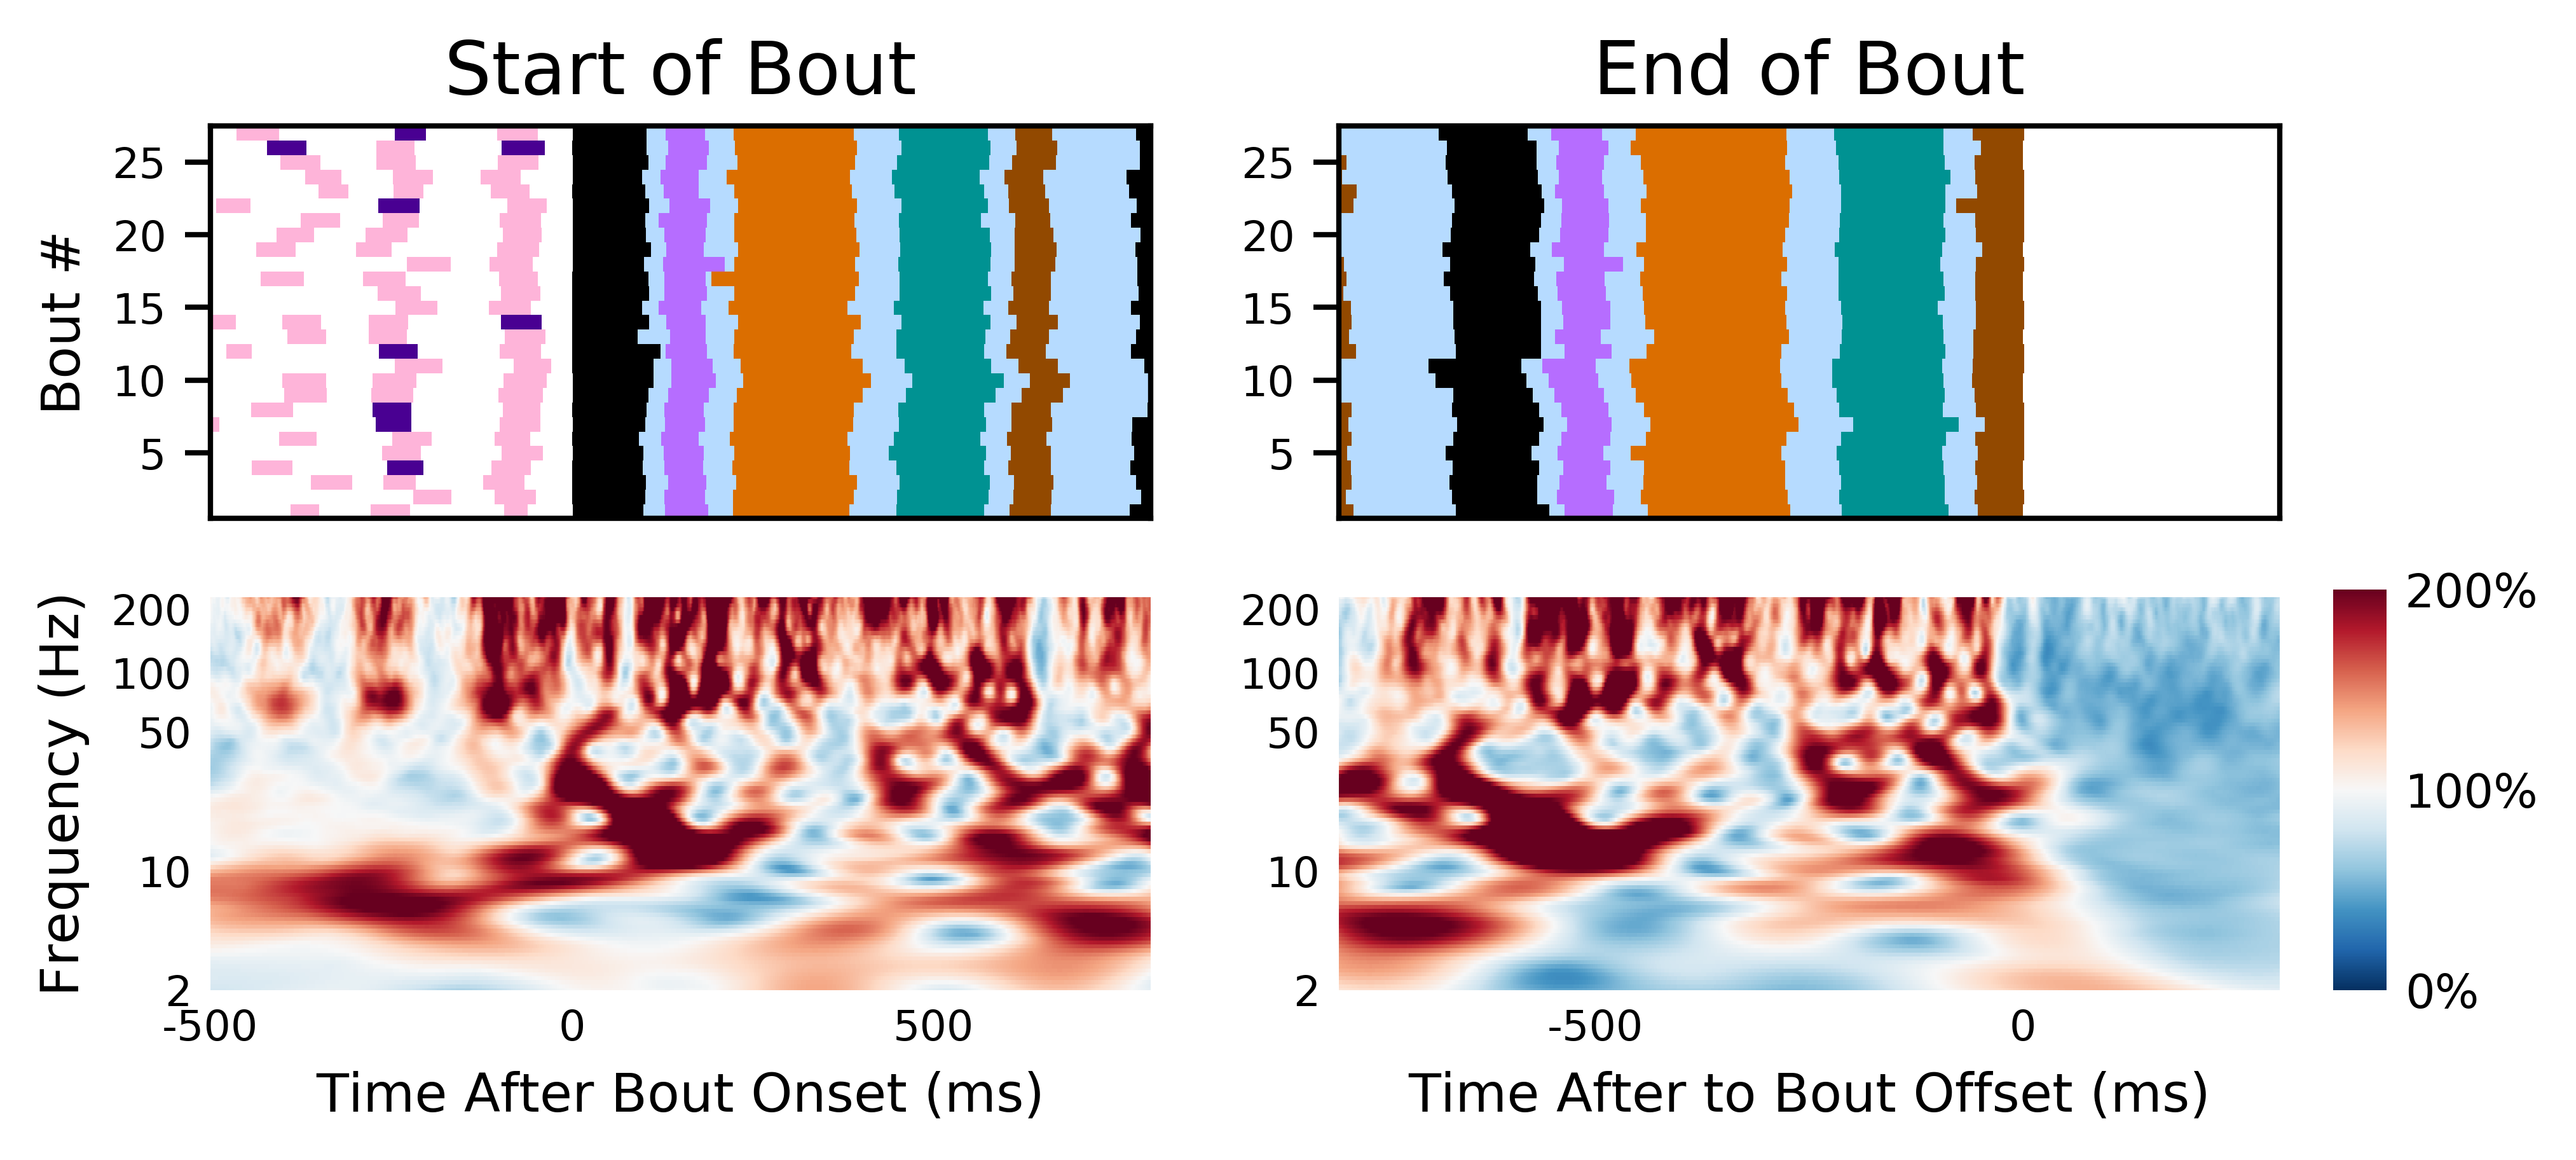

In [124]:
# Make the Figure

ch = 17

v_min = 0
v_max = 2

subsize = 10
bigsize = 14
ticksize = 8

print(len(first_events))
print(len(last_events))



fig, ax_2d = plt.subplots(2, 2, sharex=False, sharey=False, figsize=(7, 3), dpi = 300)
ax = [ax_inst for ax_inst in ax_2d.flat]

# Make A Single ColorBar
cbar_ax = fig.add_axes([0.92, 0.125, 0.02, 0.35])

# Plot First Behavior Raster
plot_behavior_test(fill_events_context = fill_events_first, context_event_times = first_event_times, 
                   context_events = first_events, ax=ax[0])
ax[0].set_title(label="Start of Bout", fontsize=bigsize)
ax[0].set_ylabel(ylabel='Bout #', fontsize=subsize)
ax[0].tick_params(axis='both', which='major', labelsize=ticksize)


# Plot First LFP
# fig.subplots_adjust(right=0.95)
# plot_pretty_ersp(mean_first[:,ch,:], first_event_times, fc_lo=fc_lo, fc_hi=fc_hi,  vmin=v_min, vmax=v_max, ax = ax[2], cbar_ax = cbar_ax)

sns.heatmap(mean_first[:,ch,:], xticklabels=first_event_times.astype(int), yticklabels= test_y.astype(int), 
                 ax=ax[2], cbar_ax=cbar_ax, vmin=v_min, vmax=v_max, cmap = 'RdBu_r', cbar_kws={'ticks': [0.0, 1.0, 2.0] })

ax[2].invert_yaxis()

ax[2].set_xlabel(xlabel='Time After Bout Onset (ms)', fontsize=subsize)
ax[2].set_ylabel(ylabel='Frequency (Hz)', fontsize=subsize)
ax[2].tick_params(axis='both', which='major', labelsize=ticksize)

for ind, label in enumerate(ax[2].get_yticklabels()):
    if ind in adjustment:
        label.set_visible(True)
    else:
        label.set_visible(False)
        
        
visible_xticks = []
visible_xtickslabels = []
for ind, label in enumerate(ax[2].get_xticklabels()):
    if ind % 500 == 0:
#             label.set_visible(True)
        visible_xticks.append(ind)
        visible_xtickslabels.append(label)
#         else:
#             label.set_visible(False)
ax[2].set_xticks(visible_xticks) 
ax[2].set_xticklabels(visible_xtickslabels, rotation=0)
ax[2].tick_params(axis='both', which='both',length=0)


# Plot Last Behavior Raster
plot_behavior_test(fill_events_context = fill_events_last, context_event_times = last_event_times, 
                   context_events = last_events, ax=ax[1])

ax[1].set_title(label="End of Bout", fontsize=bigsize)
# ax[1].set_ylabel(ylabel='Bout Instances', fontsize=subsize)
ax[1].tick_params(axis='both', which='major', labelsize=ticksize)


# Plot Last LFP
# fig.subplots_adjust(right=0.95)
# plot_pretty_ersp(mean_last[:,ch,:], last_event_times.astype(int), fc_lo=fc_lo, fc_hi=fc_hi, vmin=v_min, 
#                  vmax=v_max, ax = ax[3], cbar_ax = cbar_ax)

sns.heatmap(mean_last[:,ch,:], xticklabels=last_event_times.astype(int), yticklabels= test_y.astype(int), 
                 ax=ax[3], cbar_ax=cbar_ax, vmin=v_min, vmax=v_max, cmap = 'RdBu_r', cbar_kws={'ticks': [0.0, 1.0, 2.0] })

ax[3].invert_yaxis()


ax[3].set_xlabel(xlabel='Time After to Bout Offset (ms)', fontsize=subsize)
# ax[3].set_ylabel(ylabel='Frequency (Hz)', fontsize=subsize)
ax[3].tick_params(axis='both', which='major', labelsize=ticksize)

for ind, label in enumerate(ax[3].get_yticklabels()):
    if ind in adjustment:
        label.set_visible(True)
    else:
        label.set_visible(False)
        
        
visible_xticks = []
visible_xtickslabels = []
for ind, label in enumerate(ax[3].get_xticklabels()):
    if ind in [300, 800]:
#             label.set_visible(True)
        visible_xticks.append(ind)
        visible_xtickslabels.append(label)
#         else:
#             label.set_visible(False)
ax[3].set_xticks(visible_xticks) 
ax[3].set_xticklabels(visible_xtickslabels, rotation=0)

ax[3].tick_params(axis='both', which='both',length=0)

# Update the Colorbar Axis
cbar_ax.set_yticklabels(['0%', '100%', '200%'])
cbar_ax.tick_params(axis='y', which='both',length=0)




# # Save the Figure
# figure_name = 'Spectral_Perturbation_' + bird_id + '_' + session + '_start_end_Chan-' +  str(ch+1) + '_n-' + str(len(first_events)) + '_Final_cb.png'
# figure_type_folder = FIGURES_DIR / 'Spectral_Perturbation_Supplement'

# # Check if Folder Path Exists
# if not figure_type_folder.exists():
#     figure_type_folder.mkdir(parents=True, exist_ok=True)

# figure_location = figure_type_folder / figure_name

# # fig.savefig(figure_location, format='png')
# fig.savefig(figure_location, dpi=300, papertype=None, format='png')

-----------